In [1]:
### import necessary packages ###
import matplotlib.pylab as plt  ##plotting 
from rawice import *            ##all modules from rawice.py
import warnings
import numpy as np
import os

warnings.filterwarnings('ignore')

In [2]:
from numpy import amax, amin, linspace, polyfit, flip, asarray

# Generate a polynomial fit and return arrays of (x,y) fit values.
def makemodel(x, y, pd=1, nmodel=64, as_lists=False):
    """
    Required arguments:
       x       list-like object of x points
       y       list-like object of y points, same length as x
    Kwargs:
       pd      polynomial degree of the least-squares fit (default 1)
               degree = 1 means a straight-line fit, which hhas
               two coefficients
       nmodel  number of points in model between minimum and
               maximum x (defult 64)
       as_list Boolean.  If True, all objects are returned as lists.
               If False, they are returned as numpy arrays.  Default
               is False.
               
    Returns three lists:
       coeffs  least-square coefficients
       xmodel  x points of model
       ymodel  y points of model
       
    This function does no error checking, for example to make sure
    that the polynomial degree or number of points is positive.
    
    Example:  Call the function this way:
    
    coefficients, xmodel, ymodel = makemodel(x, y, kwargs)
    
    where 'kwargs' are any keyword arguments.
    
    Dependencies:
    numpy     to handle most list-like objects, like pandas columns
    """
    
    
    # Find minimum and maximum x
    xmin = amin(x)
    xmax = amax(x)
    
    # A series of points between minimum and maximum value
    xmodel = linspace(xmin, xmax, nmodel, endpoint=True)
    
    # Polynomial coefficients, easier understood in reverse
    # order
    c = polyfit(x, y, deg=pd, rcond=None)
    coeffs = flip(c)
    
    # Fill y array with values using our function evaluator.
    ymodel = applycoeffs(xmodel, coeffs)
        
    # Send objects back of the correct type.
    if as_lists:
        return list(coeffs), list(xmodel), asarray(ymodel)
    else:
        return coeffs, xmodel, asarray(ymodel)
    
# Apply coefficients to a set of x points.  If the input
# object is a list, then the returned object is also a list.
# Otherwise it is cast as a numpy array.
def applycoeffs(xdata, coeffs, as_lists=False):
    """
    Computes y as a function of x given a set of polynomial
    coefficients.
    
    Returns the yfit array if the input object is a list or
    list-like object, and returns a float if the input object
    is a float.
    
    """
    # If we are given a single value as an input argument,
    # return a single value
    if (str(type(xdata)) == "<class 'float'>"):
        xp  = 1.0
        yv  = coeffs[0]
        for co in coeffs[1:]:
            xp = xp * xdata      # A higher power each time
            yv = yv + co * xp
        
        return yv

    else:
        yfit = []
        for x in xdata:
            xp  = 1.0
            yv  = coeffs[0]
            for co in coeffs[1:]:
                xp = xp * x      # A higher power each time
                yv = yv + co * xp
            yfit.append(yv)
        
        if as_lists:
            return yfit
        else:
            return asarray(yfit)

In [3]:
## location of raw acq data
notebook_path = os.path.abspath("7.12 1000 fps.ipyn")
folder_path = os.path.join(os.path.dirname(notebook_path), "7.12 1000 fps/")
path = os.path.join(os.path.dirname(notebook_path), "7.12 1000 fps/000000")
## File 000006 is bad for some reason

## load data from file to object 'acq'
acq = raw_acq(path)
#help(raw_acq)
acq.adc_input

#set the input 
tm4_input = [0,0,12]
tm5101_input = [0,0,3]
chime_input = [0,0,7]

Loaded raw acq HDF5 file ... 


Checking input [0, 0, 12] ... 


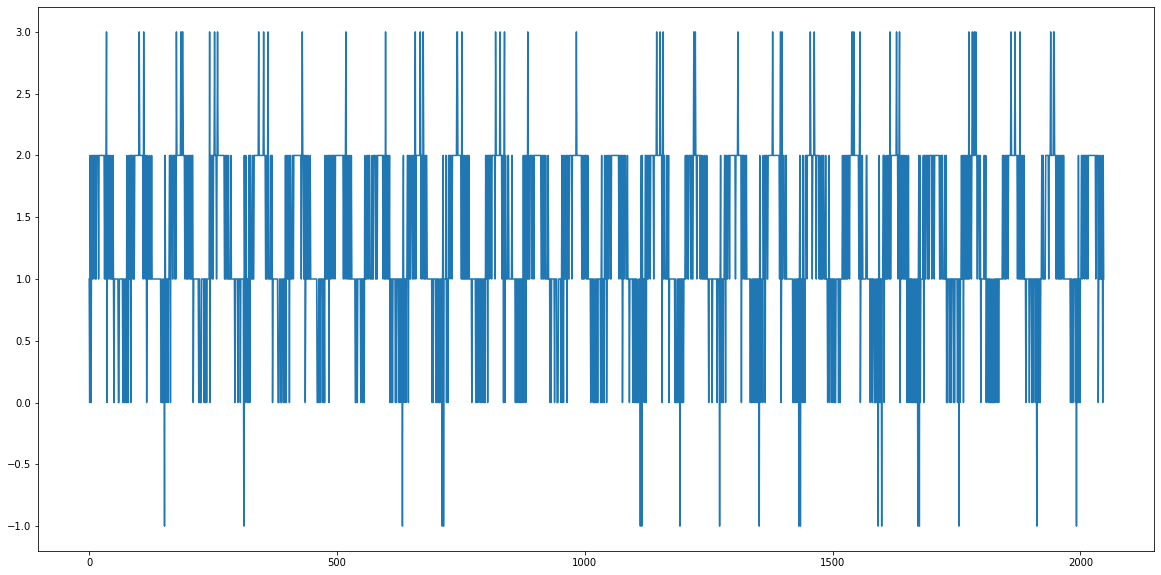

In [4]:
tm4 = acq.check_input(tm4_input)
tm4.inspect_maser()
#tm4.plot_single_input_diagnostics()

#plot the quantized sine waves
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(tm4.time_streams[0])

In [5]:
tm4_clock = analyse_maser(folder_path, tm4_input)

C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000000
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000001
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000002
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000003
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000004
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000005
Loaded raw acq HDF5 file ... .....................................................................] 0/6
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... ##...................................................................] 1/6
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... ###############......................................................] 2/6
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... #############################........................................] 3/6
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... ##########################################...........................] 4/6
Ch

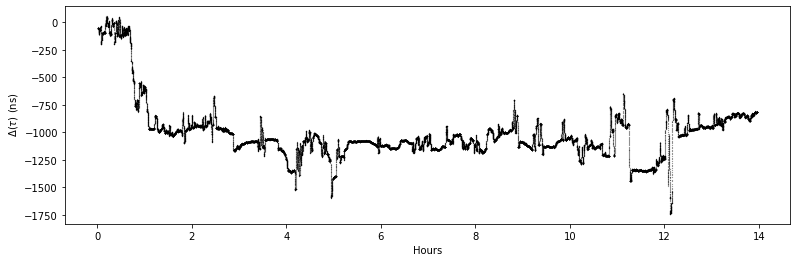

In [6]:
tm4_delays = tm4_clock.plot_delays()

Text(0.5, 1.0, 'tm4 lab vs leo')

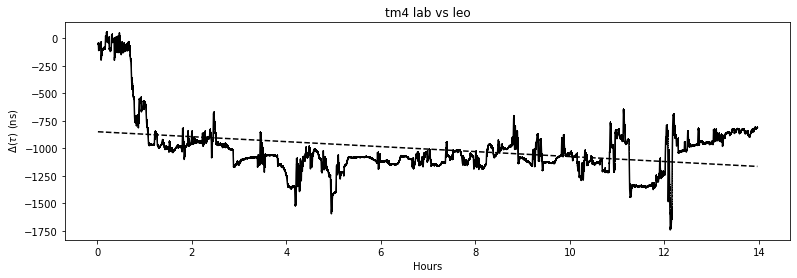

In [7]:
coeff4, x_4, y_4 = makemodel(tm4_clock.fpgatime*2.56e-6/60/60, tm4_clock.taus/1e-9, nmodel = len(tm4_clock.taus))

plt.figure(figsize=(13, 4))
plt.plot(tm4_clock.fpgatime*2.56e-6/60/60, tm4_clock.taus/1e-9, c = 'k', marker = ',')
plt.plot(x_4, y_4, '--k')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm4 lab vs leo")

Text(0.5, 1.0, 'tm4 lab vs leo corrected')

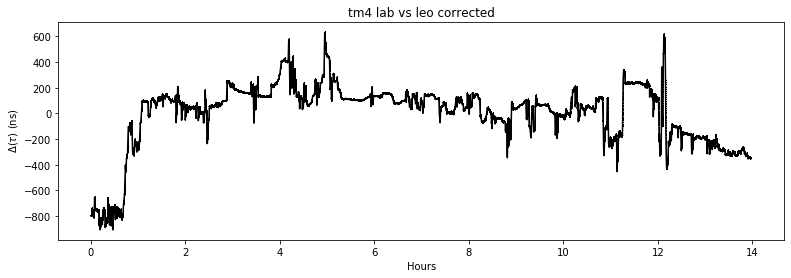

In [8]:
tm4_delays_fixed = y_4 - tm4_clock.taus/1e-9

plt.figure(figsize=(13,4))
plt.plot(tm4_clock.fpgatime*2.56e-6/60/60, tm4_delays_fixed, c='k', marker=',')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm4 lab vs leo corrected")

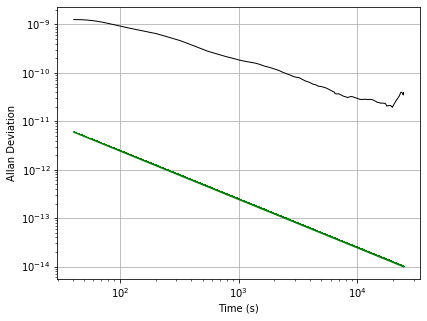

In [9]:
tm4_clock.get_allan_deviation()

Checking input [0, 0, 3] ... 


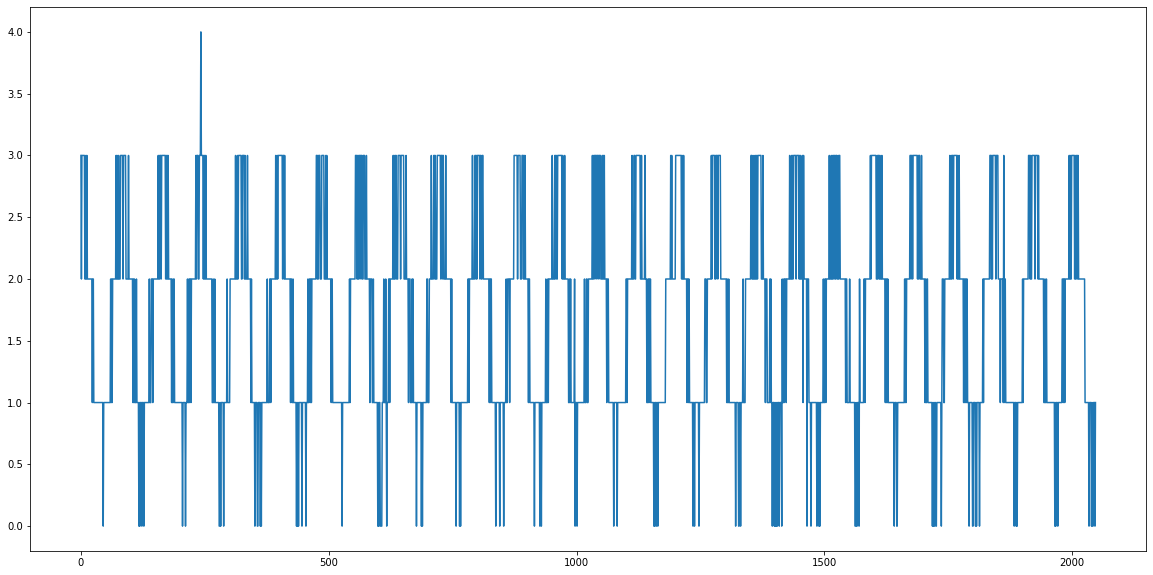

In [10]:
tm5101 = acq.check_input(tm5101_input)
tm5101.inspect_maser()
#tm5101.plot_single_input_diagnostics()
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(tm5101.time_streams[1])

In [11]:
tm5101_clock = analyse_maser(folder_path, tm5101_input)

C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000000
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000001
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000002
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000003
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000004
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000005
Loaded raw acq HDF5 file ... .....................................................................] 0/6
Checking input [0, 0, 3] ... 
Loaded raw acq HDF5 file ... ##...................................................................] 1/6
Checking input [0, 0, 3] ... 
Loaded raw acq HDF5 file ... ###############......................................................] 2/6
Checking input [0, 0, 3] ... 
Loaded raw acq HDF5 file ... #############################........................................] 3/6
Checking input [0, 0, 3] ... 
Loaded raw acq HDF5 file ... ##########################################...........................] 4/6
Checki

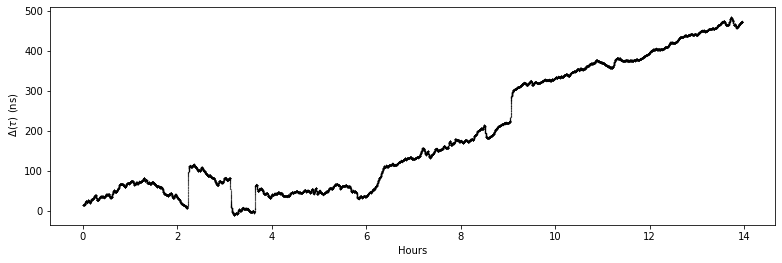

In [12]:
tm5101_delays = tm5101_clock.plot_delays()

[-58.63512386 -58.62498902 -58.61485418 ... 439.48228496 439.4924198
 439.50255464]
[1.50718623e-08 1.48236660e-08 1.49134332e-08 ... 4.73939311e-07
 4.73958827e-07 4.74405133e-07]


Text(0.5, 1.0, 'tm5101 vs leo')

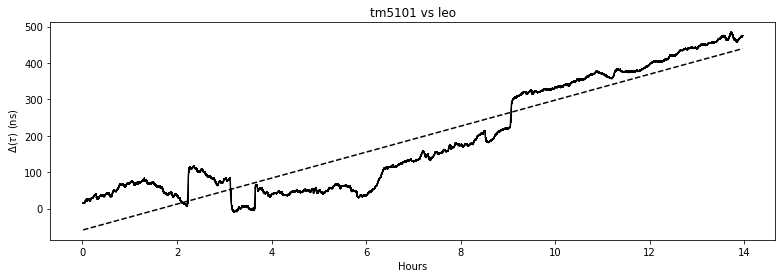

In [13]:
coeff5101, x_5101, y_5101 = makemodel(tm5101_clock.fpgatime*2.56e-6/60/60, tm5101_clock.taus/1e-9, nmodel = len(tm5101_clock.taus))

print(y_5101)
print(tm5101_clock.taus)

plt.figure(figsize=(13, 4))
plt.plot(tm5101_clock.fpgatime*2.56e-6/60/60, tm5101_clock.taus/1e-9, c = 'k', marker = ',')
plt.plot(x_5101, y_5101, '--k')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm5101 vs leo")

Text(0.5, 1.0, 'tm5101 vs leo corrected')

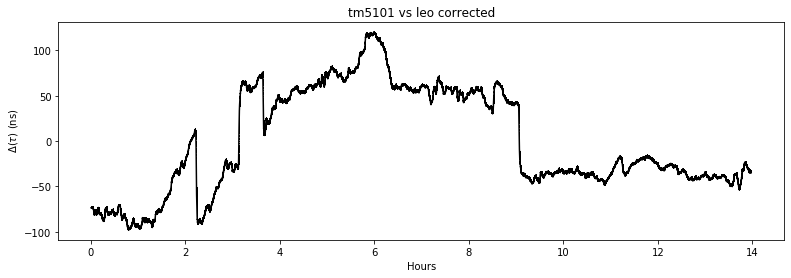

In [14]:
tm5101_delays_fixed = y_5101 - tm5101_clock.taus/1e-9

plt.figure(figsize=(13,4))
plt.plot(tm5101_clock.fpgatime*2.56e-6/60/60, tm5101_delays_fixed, c='k', marker=',')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm5101 vs leo corrected")

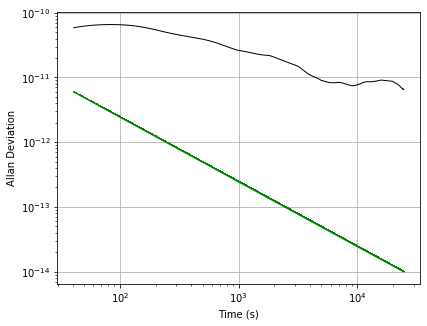

In [15]:
tm5101_clock.get_allan_deviation()

Checking input [0, 0, 7] ... 


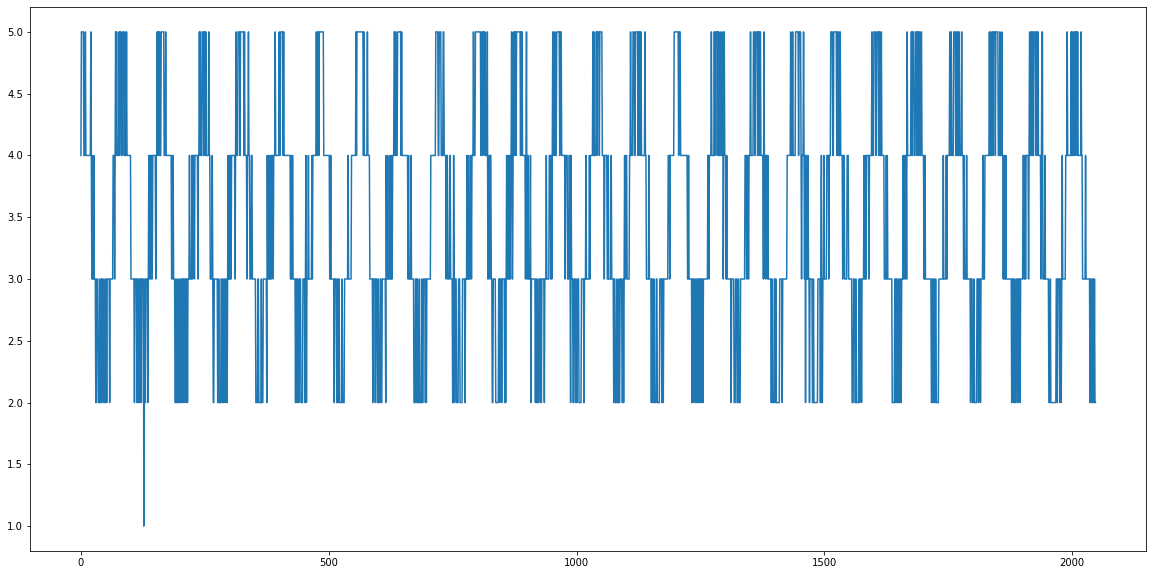

In [16]:
chime = acq.check_input(chime_input)
chime.inspect_maser()
#tm5101.plot_single_input_diagnostics()
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(chime.time_streams[1])

In [17]:
chime_clock = analyse_maser(folder_path, chime_input)

C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000000
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000001
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000002
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000003
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000004
C:\Users\audre\Documents\WVU REU 2022\7.12 1000 fps\000005
Loaded raw acq HDF5 file ... .....................................................................] 0/6
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... ##...................................................................] 1/6
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... ###############......................................................] 2/6
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... #############################........................................] 3/6
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... ##########################################...........................] 4/6
Checki

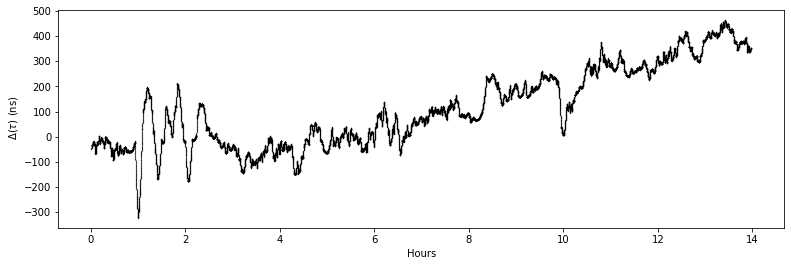

In [18]:
chime_delays = chime_clock.plot_delays()

Text(0.5, 1.0, 'tm4 chime vs leo')

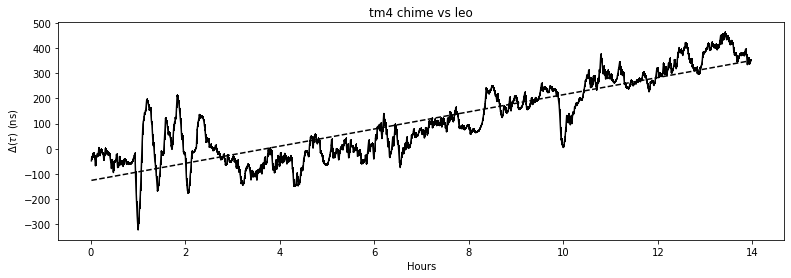

In [19]:
coeffchime, x_chime, y_chime = makemodel(chime_clock.fpgatime*2.56e-6/60/60, chime_clock.taus/1e-9, nmodel = len(chime_clock.taus))

plt.figure(figsize=(13, 4))
plt.plot(chime_clock.fpgatime*2.56e-6/60/60, chime_clock.taus/1e-9, c = 'k', marker = ',')
plt.plot(x_chime, y_chime, '--k')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm4 chime vs leo")

Text(0.5, 1.0, 'tm4 chime vs leo corrected')

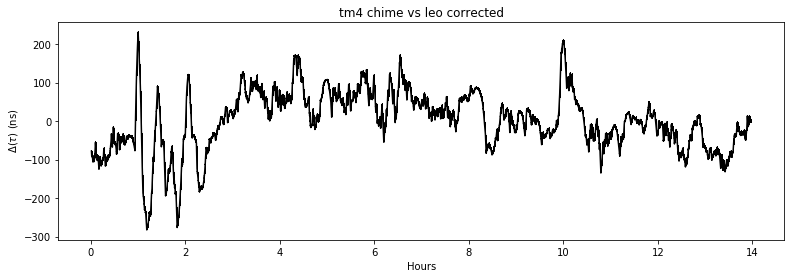

In [20]:
chime_delays_fixed = y_chime - chime_clock.taus/1e-9

plt.figure(figsize=(13,4))
plt.plot(chime_clock.fpgatime*2.56e-6/60/60, chime_delays_fixed, c='k', marker=',')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm4 chime vs leo corrected")

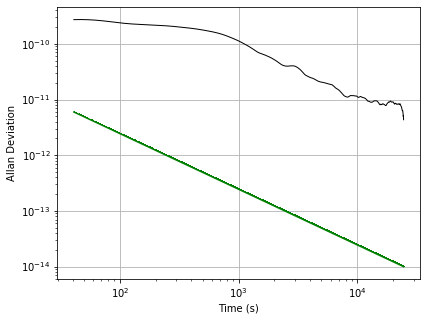

In [21]:
chime_clock.get_allan_deviation()

Text(0.5, 1.0, 'tm4 lab vs tm4 chime')

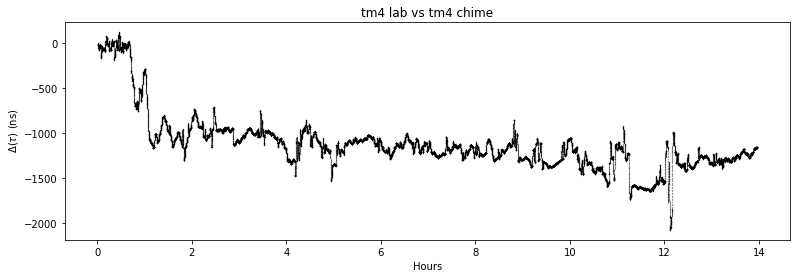

In [22]:
tm4_chime = tm4_clock.taus - chime_clock.taus

plt.figure(figsize=(13, 4))
plt.scatter(tm4_clock.fpgatime*2.56e-6/60/60, tm4_chime/1e-9, s= 0.1, c = 'k', marker = '.')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm4 lab vs tm4 chime")

Text(0.5, 1.0, 'tm4 lab vs tm4 chime')

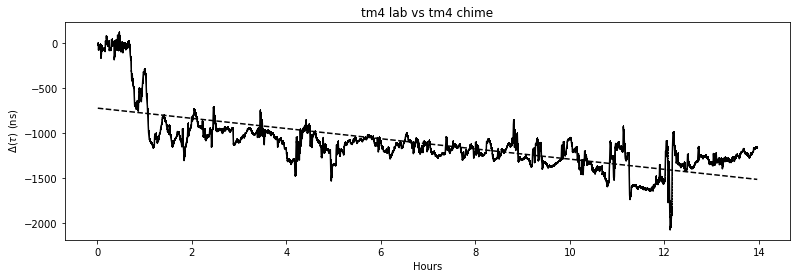

In [23]:
coefftm, x_tm, y_tm = makemodel(chime_clock.fpgatime*2.56e-6/60/60, tm4_chime/1e-9, nmodel = len(tm4_chime))

plt.figure(figsize=(13, 4))
plt.plot(chime_clock.fpgatime*2.56e-6/60/60, tm4_chime/1e-9, c = 'k', marker = ',')
plt.plot(x_tm, y_tm, '--k')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm4 lab vs tm4 chime")

Text(0.5, 1.0, 'tm4 lab vs tm4 chime corrected')

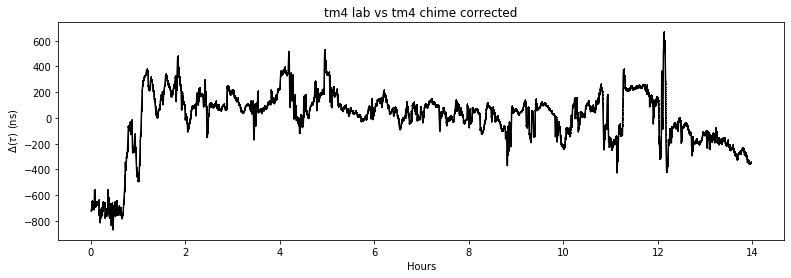

In [24]:
tm_delays_fixed = y_tm - tm4_chime/1e-9

plt.figure(figsize=(13,4))
plt.plot(chime_clock.fpgatime*2.56e-6/60/60, tm_delays_fixed, c='k', marker=',')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm4 lab vs tm4 chime corrected")

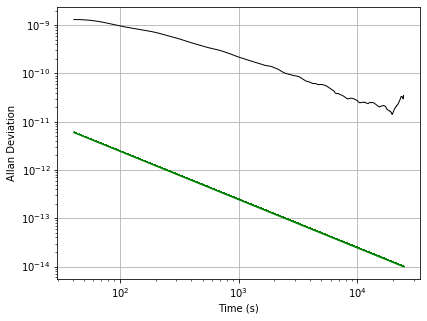

In [25]:
taus_tm = tm4_clock.fpgatime*2.56e-6
(taus1, adevs1, errors1, ns1) = allan.oadev(tm4_chime, taus = taus_tm)
adev_exp_tm = [(1/x)*(2*1e-10)*((3/2)**(1/2)) for x in taus1]
plt.figure(figsize=(6.5,5))
plt.loglog(taus1,adevs1, c = 'k', lw = 1)
plt.loglog(taus1, adev_exp_tm, marker = ',', c = 'green')
plt.ylabel("Allan Deviation")
plt.xlabel("Time (s)")
plt.grid()

Text(0.5, 1.0, 'tm4 lab vs tm5101')

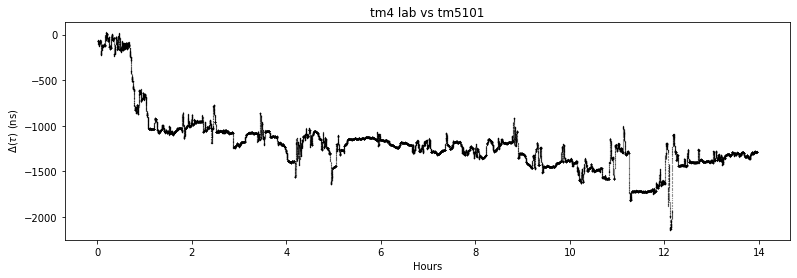

In [26]:
tm4_tm5101 = tm4_clock.taus - tm5101_clock.taus

plt.figure(figsize=(13, 4))
plt.scatter(tm4_clock.fpgatime*2.56e-6/60/60, tm4_tm5101/1e-9, s= 0.1, c = 'k', marker = '.')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm4 lab vs tm5101")

Text(0.5, 1.0, 'tm4 lab vs tm5101')

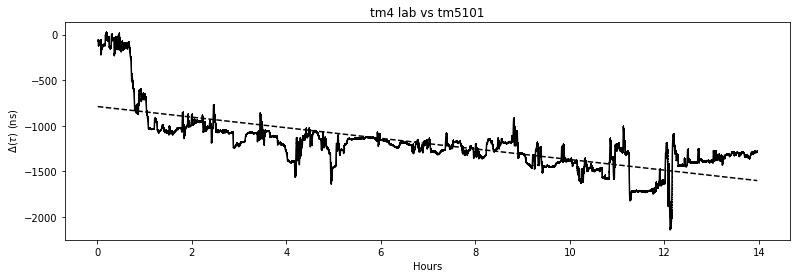

In [27]:
coeff4_5101, x_4_5101, y_4_5101 = makemodel(tm4_clock.fpgatime*2.56e-6/60/60, tm4_tm5101/1e-9, nmodel = len(tm4_tm5101))

plt.figure(figsize=(13, 4))
plt.plot(tm4_clock.fpgatime*2.56e-6/60/60, tm4_tm5101/1e-9, c = 'k', marker = ',')
plt.plot(x_4_5101, y_4_5101, '--k')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm4 lab vs tm5101")

Text(0.5, 1.0, 'tm4 lab vs tm5101 corrected')

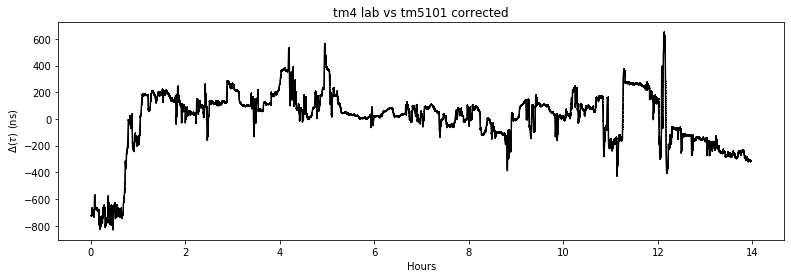

In [28]:
tm4_5101_delays_fixed = y_4_5101 - tm4_tm5101/1e-9

plt.figure(figsize=(13,4))
plt.plot(tm4_clock.fpgatime*2.56e-6/60/60, tm4_5101_delays_fixed, c='k', marker=',')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm4 lab vs tm5101 corrected")

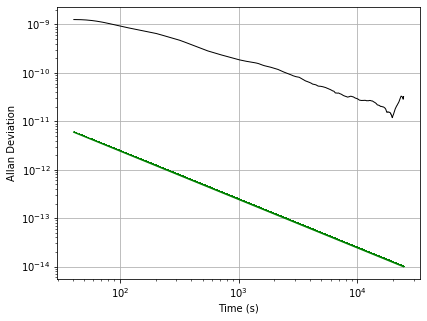

In [29]:
taus_4_5101 = tm4_clock.fpgatime*2.56e-6
(taus2, adevs2, errors2, ns2) = allan.oadev(tm4_tm5101, taus = taus_4_5101)
adev_exp_4_5101 = [(1/x)*(2*1e-10)*((3/2)**(1/2)) for x in taus2]
plt.figure(figsize=(6.5,5))
plt.loglog(taus2,adevs2, c = 'k', lw = 1)
plt.loglog(taus2, adev_exp_4_5101, marker = ',', c = 'green')
plt.ylabel("Allan Deviation")
plt.xlabel("Time (s)")
plt.grid()

Text(0.5, 1.0, 'tm4 lab vs tm5101')

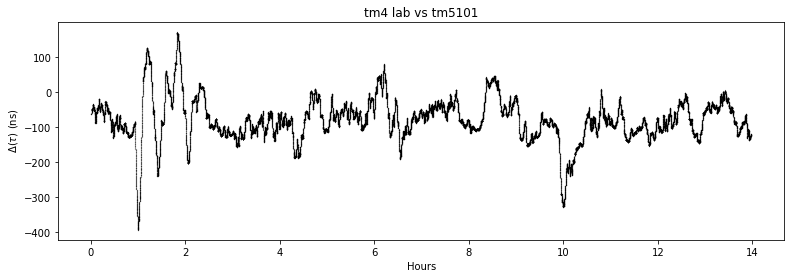

In [30]:
chime_tm5101 = chime_clock.taus - tm5101_clock.taus

plt.figure(figsize=(13, 4))
plt.scatter(chime_clock.fpgatime*2.56e-6/60/60, chime_tm5101/1e-9, s= 0.1, c = 'k', marker = '.')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.title("tm4 lab vs tm5101")

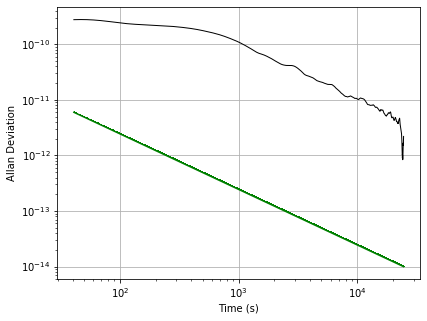

In [31]:
taus_chime_5101 = chime_clock.fpgatime*2.56e-6
(taus3, adevs3, errors3, ns3) = allan.oadev(chime_tm5101, taus = taus_chime_5101)
adev_exp_chime_5101 = [(1/x)*(2*1e-10)*((3/2)**(1/2)) for x in taus3]
plt.figure(figsize=(6.5,5))
plt.loglog(taus3,adevs3, c = 'k', lw = 1)
plt.loglog(taus3, adev_exp_chime_5101, marker = ',', c = 'green')
plt.ylabel("Allan Deviation")
plt.xlabel("Time (s)")
plt.grid()

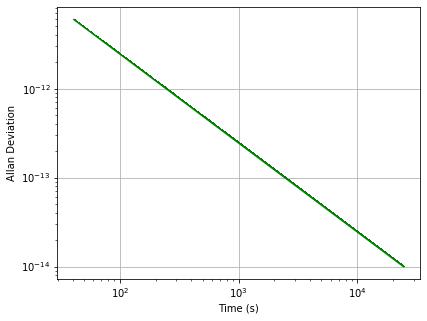

In [32]:
taus_chime_5101 = chime_clock.fpgatime*2.56e-6
adev_exp_chime_5101 = [(1/x)*(2*1e-10)*((3/2)**(1/2)) for x in taus3]

plt.figure(figsize=(6.5,5))
plt.loglog(taus3, adev_exp_chime_5101, marker = ',', c = 'green')
plt.ylabel("Allan Deviation")
plt.xlabel("Time (s)")
plt.grid()